In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import tensorflow as tf 
import numpy as np
import os
import matplotlib.pyplot as plt 

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

rawdir = listdir_nohidden('/content/drive/MyDrive/301data/FERG_DB_256_reduced')
Name = sorted(rawdir)
n = len(Name)
N = list(range(n))
string_to_num_mapping = dict(zip(Name,N)) 
num_to_string_mapping = dict(zip(N,Name)) 
string_to_num_mapping

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'joy': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

In [14]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.3,
    rescale=1./256)
root_dir = '/content/drive/MyDrive/301data/FERG_DB_256_reduced'

img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(256,256),
    batch_size=128,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical',
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(256,256),
    batch_size=128,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical',
    subset="validation")


imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
  value=np.argmax(label)
  plt.imshow(img)
  plt.title(num_to_string_mapping[value])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
import sys
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import ResNet50

base_model_resnset = ResNet50(weights='imagenet',
include_top=False,
input_shape=(256, 256, 3))

# Base layer should not be trainable
for layer in base_model_resnset.layers[:]:
   layer.trainable = False

print(base_model_resnset.summary())
model = models.Sequential()
model.add(base_model_resnset)
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [10]:
len(base_model_resnset.layers)

175

In [20]:
model.compile(optimizer=optimizers.Adam(learning_rate = 0.0001),
              loss= tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])


In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Flatten, LeakyReLU, Dense, Dropout
cb_function = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, callbacks=[cb_function], batch_size=64, epochs=40) 

Epoch 1/40
42/42 [==============================] - 35s 765ms/step - loss: 1.2683 - categorical_accuracy: 0.5601 - val_loss: 1.5034 - val_categorical_accuracy: 0.6008
Epoch 2/40
42/42 [==============================] - 31s 730ms/step - loss: 1.2221 - categorical_accuracy: 0.5079 - val_loss: 1.5984 - val_categorical_accuracy: 0.5116
Epoch 3/40
42/42 [==============================] - 31s 731ms/step - loss: 1.2036 - categorical_accuracy: 0.5293 - val_loss: 1.5040 - val_categorical_accuracy: 0.5411
Epoch 4/40
42/42 [==============================] - 31s 745ms/step - loss: 1.1572 - categorical_accuracy: 0.6002 - val_loss: 1.5243 - val_categorical_accuracy: 0.6008
Epoch 5/40
42/42 [==============================] - 31s 737ms/step - loss: 1.1480 - categorical_accuracy: 0.6073 - val_loss: 1.5341 - val_categorical_accuracy: 0.5951
Epoch 6/40
42/42 [==============================] - 30s 729ms/step - loss: 1.1077 - categorical_accuracy: 0.5693 - val_loss: 1.4187 - val_categorical_accuracy: 0.465

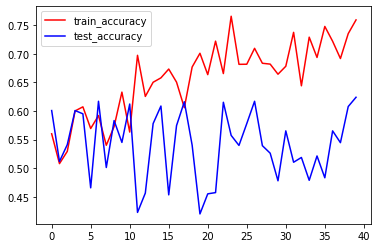

In [27]:
plt.plot(history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

In [28]:
np.max(history.history["val_categorical_accuracy"]), np.mean(history.history["val_categorical_accuracy"])

(0.6240667700767517, 0.5406126461923122)

In [29]:
imgs, labels = next(iter(img_generator_flow_valid))
preds = model.predict(imgs)
pred_labels = tf.argmax(preds, axis = -1)

LABEL = []
for item in labels:
    LABEL += [np.argmax(item)]
print(LABEL)

PRED = pred_labels.numpy().tolist()

from sklearn.metrics import classification_report
print(classification_report(LABEL, PRED))

4/4 [==============================] - 0s 27ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     128.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00     128.0
   macro avg       0.00      0.00      0.00     128.0
weighted avg       0.00      0.00      0.00     128.0



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1